In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

**Importing the dataset**

In [42]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [43]:
df.drop(columns="User ID",inplace=True)
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [44]:
df["Age"].max()

60

**Feature Scaling**

In [45]:
X=df[["Gender","Age","EstimatedSalary"]]
y=df["Purchased"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25) # train- test split


In [46]:
X_test

,Gender,Age,EstimatedSalary
354,1,36,99000
122,0,40,75000
323,0,48,30000
160,1,32,100000
329,0,47,107000
...,...,...,...
393,1,60,42000
378,1,41,87000
26,1,49,28000
217,1,40,78000


**Fitting Decision Tree Classification to the Training set**

In [47]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train) 
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
    print("depth value  : " , depth, " train score : ", dt.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(dt, X_train, y_train, cv=10)))


depth value  :  1  train score :  0.85  cv score :  0.8433333333333334
depth value  :  2  train score :  0.92  cv score :  0.9166666666666667
depth value  :  3  train score :  0.92  cv score :  0.9100000000000001
depth value  :  4  train score :  0.9366666666666666  cv score :  0.8966666666666667
depth value  :  5  train score :  0.9433333333333334  cv score :  0.8833333333333334
depth value  :  6  train score :  0.9666666666666667  cv score :  0.8800000000000001
depth value  :  7  train score :  0.9733333333333334  cv score :  0.89
depth value  :  8  train score :  0.9833333333333333  cv score :  0.8833333333333334
depth value  :  9  train score :  0.99  cv score :  0.8833333333333334
depth value  :  10  train score :  0.9966666666666667  cv score :  0.8866666666666667
depth value  :  20  train score :  0.9966666666666667  cv score :  0.8933333333333333


**Predicting the Test set results**

In [48]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [49]:
dt.score(X_test,y_test)

0.88

In [50]:
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8759818106655642

**Making the Confusion Matrix**

In [52]:
confusion_matrix(y_test,y_pred)

array([[53,  6],
       [ 6, 35]], dtype=int64)

In [53]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)
importance = dt.feature_importances_
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.0, 'Gender'),
 (0.5620335615029608, 'Age'),
 (0.43796643849703926, 'EstimatedSalary')]

### Building a tree

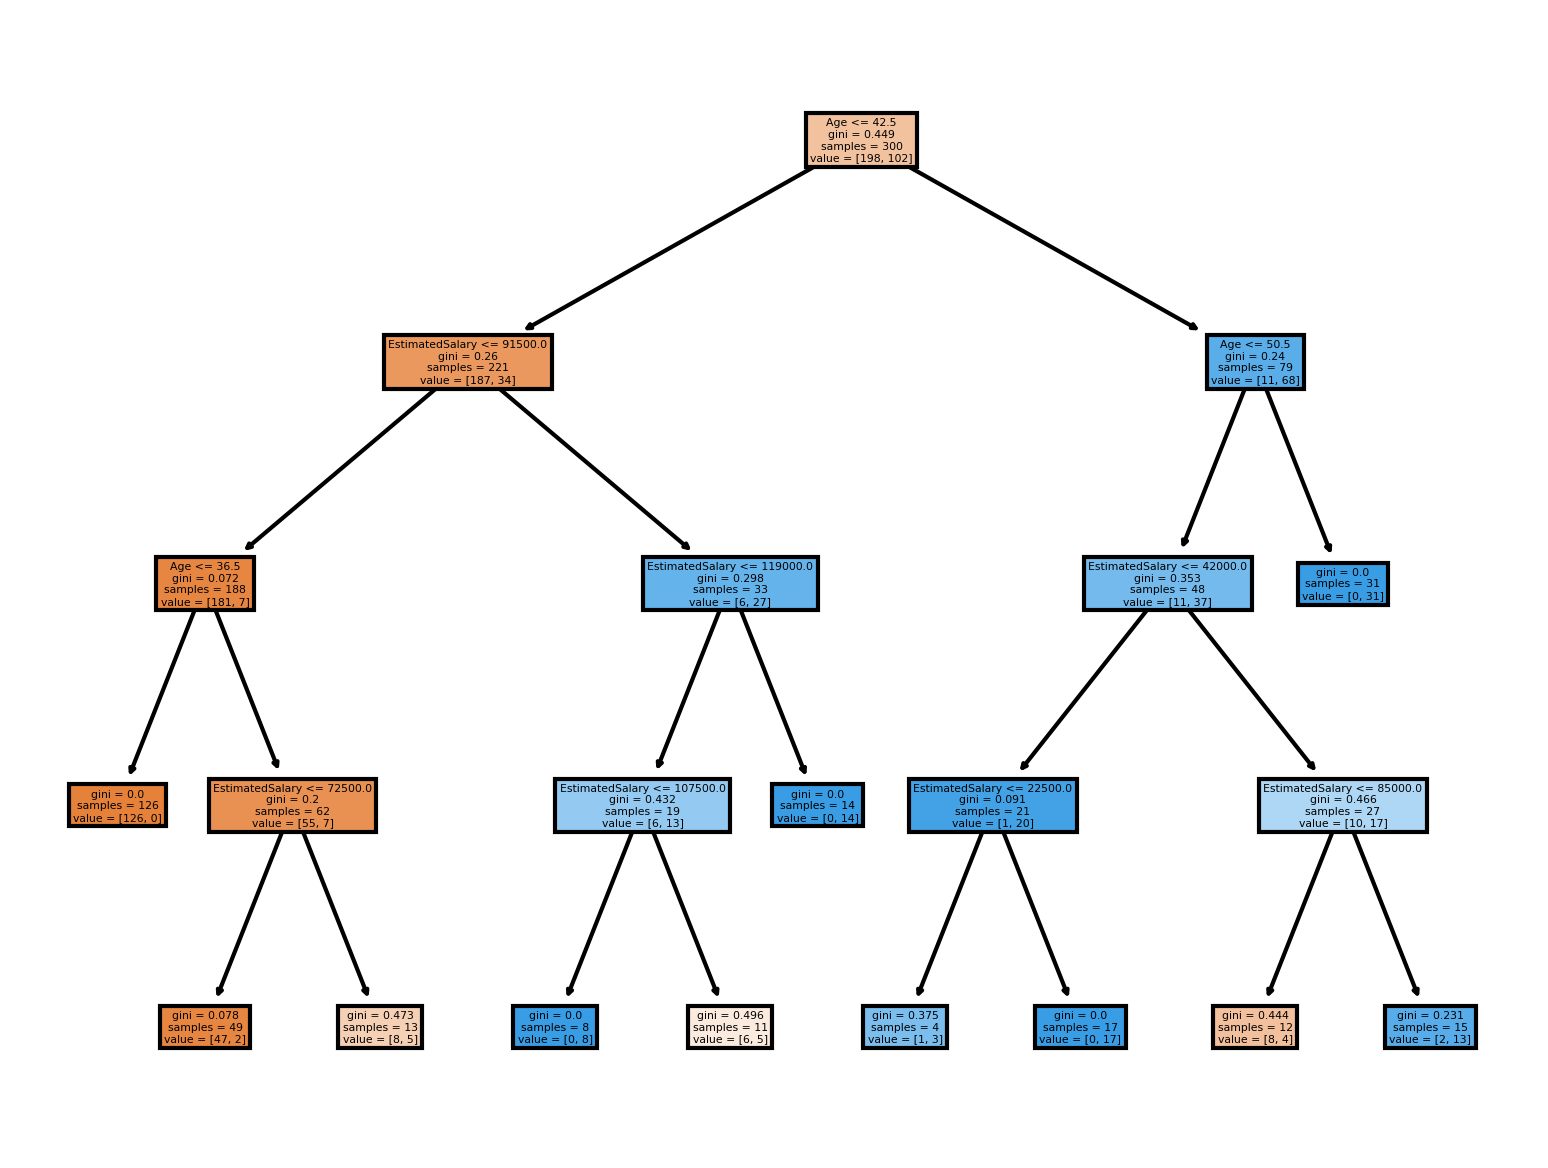

In [54]:
from sklearn import tree

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=300)
tree.plot_tree(dt,feature_names = X_test.columns,filled = True);
fig.savefig('imagename.png')

**Visualising the Training set results**

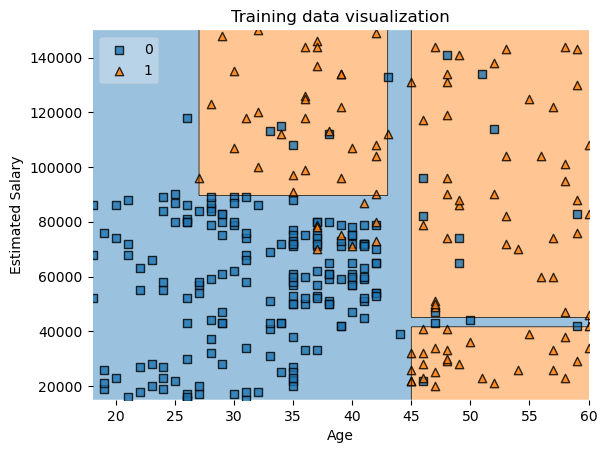

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

#print(X_train)
dt = DecisionTreeClassifier(max_depth=4)
X_train = X_train.loc[:,['Age','EstimatedSalary']]
X_test = X_test.loc[:,['Age','EstimatedSalary']]
dt.fit(X_train, y_train)

ax=plot_decision_regions(X_train.values, y_train.values, clf=dt, legend= 2)
ax.set_ylim(X_train["EstimatedSalary"].min(), X_train["EstimatedSalary"].max())
ax.set_xlim(X_train["Age"].min(), X_train["Age"].max())
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Training data visualization");

**Visualising the Test set results**

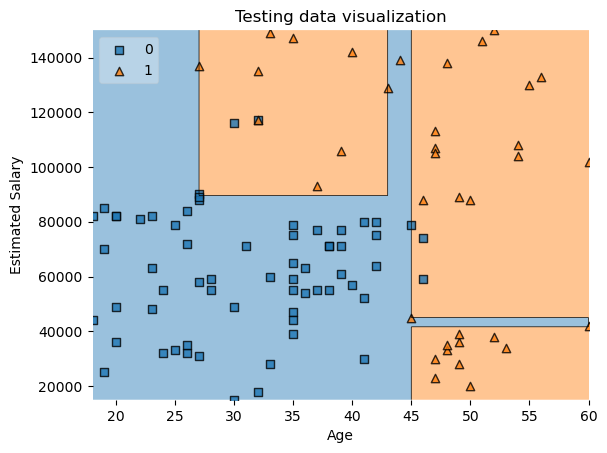

In [56]:
ax=plot_decision_regions(X_test.values, y_test.values, clf=dt, legend= 2)
ax.set_ylim(X_test["EstimatedSalary"].min(), X_test["EstimatedSalary"].max())
ax.set_xlim(X_test["Age"].min(), X_test["Age"].max())
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Testing data visualization");